### Example start
First we will look at a "good example". By this I mean there are enough points that can give a good representation of the plateau at both ends of the response. This is necessary to determine the general curve. 

Here a .csv file will be read as a Pandas DataFrame. The current version of py50 requires a column with the drug name, drug concentration, and response average for the calculations. As seen in the [Quickstart tutorial](https://tlint101.github.io/practice-in-code/posts/6-py50-QuickStart.html), the "calculate_IC50" will output a table with the final calculations. By default, the IC50 value is the **Relative IC50 value**.

In [1]:
# Import packages
import pandas as pd
from py50.calculator import Calculator
from py50.plotcurve import PlotCurve

# Import Dataset
good_example_df = pd.read_csv('datasets/py50/single_example.csv')
good_example = Calculator(good_example_df) # Instantiate table into Calculator class
good_example.show().head()

,Compound Name,Compound Conc,% Inhibition 1,% Inhibition 2,% Inhibition Avg
0,Drug 1,100000.0,90,94,92
1,Drug 1,33300.0,97,89,93
2,Drug 1,11100.0,86,89,88
3,Drug 1,3700.0,81,88,84
4,Drug 1,1240.0,63,70,67


In [2]:
# Calculate IC50
relative_ic50 = good_example.calculate_ic50(name_col='Compound Name', concentration_col='Compound Conc', response_col='% Inhibition Avg')
relative_ic50

,compound_name,maximum,minimum,ic50 (nM),hill_slope
0,Drug 1,92.854428,-7.640263,439.823988,1.040875


We can double check the calculations if we like. There are two online IC50 calculators, [AATBioquest IC50 Calculator](https://www.aatbio.com/tools/ic50-calculator) and the [Very Simple IC50 Tool Kit](http://ic50.org/index.html), both of which also give a relative IC50 value of 439.82 nM. 

What does that mean graphically? Here, a graph of the dataset will be plotted with a box to highlight the Relative IC50 value. For this we can use the "conc_target" parameter, which will take in the input concentration of interest and draw a box between the X and Y axis with the curve at the intersection. In this case, we will see where the Relative IC50 value (439.82 nM) lands on the curve. This can also be checked using the "verbose=True" argument. 

Drug 1 concentration will be in µM!
Concentration on X-axis will be in µM
Box X intersection:  0.44 µM
Box Y intersection:  42.607 %


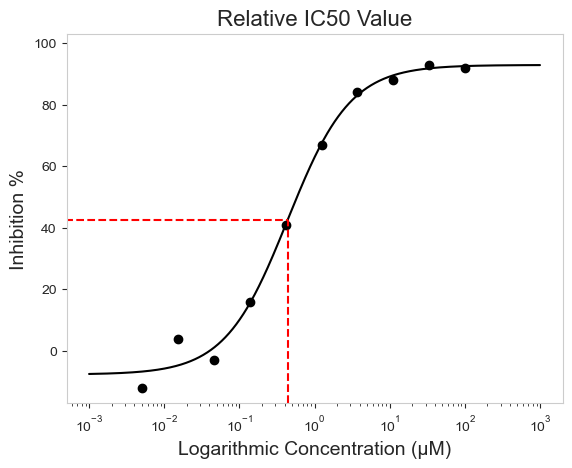

In [3]:
# Instantiate table into PlotCurve class
absolute = PlotCurve(good_example_df)
figure = absolute.single_curve_plot(concentration_col='Compound Conc',
                                    response_col='% Inhibition Avg',
                                    plot_title='Relative IC50 Value',
                                    drug_name='Drug 1',
                                    xlabel='Logarithmic Concentration (µM)',
                                    ylabel='Inhibition %',
                                    conc_unit='µM', # Plot the concentration in µM
                                    box=True,
                                    box_color='red',
                                    conc_target=0.43982, # the IC50 value must be in same units as label
                                    xscale_ticks=(-3, 3), # To extend the tail at both ends of the curve
                                    figsize=(6.4, 4.8),
                                    verbose=True)

Notice that the box is not at the 50% mark on the Y-Axis. Actually it is roughly 42.61% according to the output. Again, we can check this using the AATBioquest IC50 calculator, which also gives an inhibition response of 42.61% for the relative IC50 value. The calculations are consistent with each other. The final result si an IC50 value not exactly at the 50% response mark. Essentially, what is shown is the **Relative IC50 value**. 

### Comparison to Absolute IC50
What if we are interested to know the concentration at exactly 50% response? This number will be the **Absolute IC50** value. We can calculate that easily with the "calculate_absolute_ic50" function. The exact Absolute IC50 value can also be highlighted using the 'Box=True' parameter and removing the 'conc_target=' parameter. By default, the box will be drawn at 50% response.

Bear in mind - Absolute IC50 in this case is relative to the input dataset. Like the relative IC50 value, it can change depending on a number of factors. 

When calculating the Absolute IC50 with py50, by default it will output both the Relative and Absolute IC50 values.

The Absolute IC50 for this dataset can be calculated and plotted as follows:

In [4]:
# Calculate Absolute IC50
absolute_ic50 = good_example.calculate_absolute_ic50(name_col='Compound Name', concentration_col='Compound Conc', response_col='% Inhibition Avg')
absolute_ic50

,compound_name,maximum,minimum,relative ic50 (nM),absolute ic50 (nM),hill_slope
0,Drug 1,92.854428,-7.640263,439.823988,584.734114,1.040875


Drug 1 concentration will be in nM!
Concentration on X-axis will be in nM
Box X intersection:  584.742 nM
Box Y intersection:  50 %


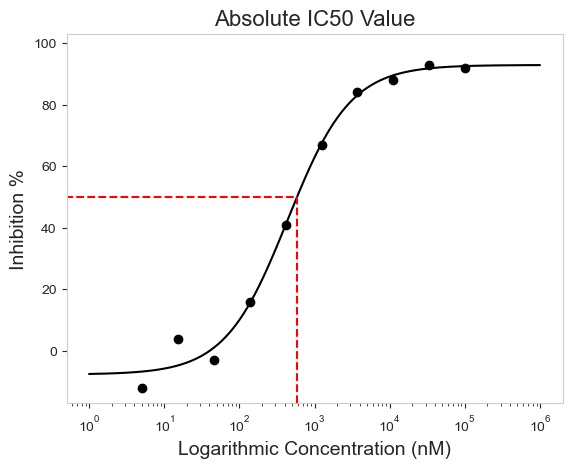

In [5]:
# Plot Figure
absolute = PlotCurve(good_example_df)
figure = absolute.single_curve_plot(concentration_col='Compound Conc',
                                    response_col='% Inhibition Avg',
                                    plot_title='Absolute IC50 Value',
                                    drug_name='Drug 1',
                                    xlabel='Logarithmic Concentration (nM)',
                                    ylabel='Inhibition %',
                                    box=True,
                                    box_color='red',
                                    xscale_unit='µM',
                                    box_intercept=50,
                                    xscale_ticks=(0, 6),
                                    figsize=(6.4, 4.8),
                                    verbose=True)

The concentration for the Absolute IC50 will be 585.47 for this dataset. Again, it can be double checked using the AATBioquest IC50 calculator. When comparing the results on the AATBioquest calculator, the concentration at 50% response on the Y-axis also outputs an X-axis value of 584.72, similar to our calculated Absolute IC50 table.

### Why go through all of this?
IC50 can be ambiguous. There are a lot of factors that can influence the final results. It can also be impacted by the experimental design. The minimum number of concentrations needed to calculate IC50 is two, however there are varying methods that can result in varying numbers. py50, for example, requires at least 4 datapoints to calculate the IC50. And it is always advisable to test at more concentrations than 2 (I would be suspicious if there was only 2 points!). Typically, the more concentrations tested the better and more accurate the calculated IC50 will be. 

Here is another example. In this case, the dummy drug was only tested at five different concentrations.

In [6]:
confusing_example_df = pd.read_csv('datasets/py50/absolute_example.csv')
confusing_example = Calculator(confusing_example_df)
confusing_example.show()

,Compound Name,Compound Conc,% Inhibition 1,% Inhibition 2,% Inhibition Avg
0,Say Wha?,10000,70,71,70
1,Say Wha?,3000,61,59,60
2,Say Wha?,1000,42,44,43
3,Say Wha?,300,25,24,24
4,Say Wha?,100,9,10,10


In [7]:
confusing_absolute = confusing_example.calculate_absolute_ic50(name_col='Compound Name', concentration_col='Compound Conc', response_col='% Inhibition Avg') 
confusing_absolute

,compound_name,maximum,minimum,relative ic50 (nM),absolute ic50 (nM),hill_slope
0,Say Wha?,78.113654,-3.368611,694.869229,1498.098675,0.834368


Notice that with this example, **the Relative IC50 and the Absolute IC50 values vary greatly**, with the Relative being in the nM and Absolute being in the µM range. A huge difference! Again, similar calculations are seen when using the AATBioquest IC50 calculator. When plotting the results, disheartening results are also shown. 

Say Wha? concentration will be in µM!
Concentration on X-axis will be in µM
Box X intersection:  0.695 µM
Box Y intersection:  37.372 %


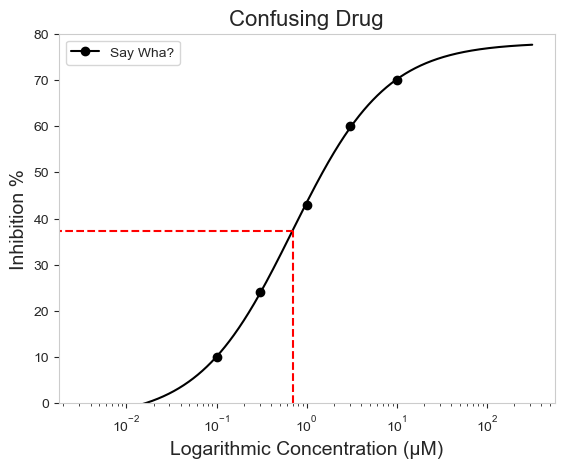

In [8]:
test = PlotCurve(confusing_example_df)
figure = test.single_curve_plot(concentration_col='Compound Conc',
                                response_col='% Inhibition Avg',
                                plot_title='Confusing Drug',
                                drug_name='Say Wha?',
                                xlabel='Logarithmic Concentration (µM)',
                                ylabel='Inhibition %',
                                legend=True,
                                conc_unit='µM',
                                xscale_ticks=(-2.5, 2.5),
                                line_color='black',
                                box=True,
                                box_color='red',
                                conc_target=0.69487, # Relative IC50 results
                                figsize = (6.4, 4.8),
                                verbose=True)

More specifically, the **Relative IC50** for the Say Wha? is closer to 37.3%. As personal preference, I do not think this is indicative of the meaning for "IC50". It is further from teh 50% than the first example above! When the plot is adjusted for the **Absolute IC50** below, we see a more reasonable graph representation. More specifically, the **Absolute IC50** would make more sense in relation to the data as the 50% inhibition would be located somewhere between 3000 and 1000 nM (See Table in cell 7).

Say Wha? concentration will be in µM!
Concentration on X-axis will be in µM
Box X intersection:  1.498 µM
Box Y intersection:  50 %


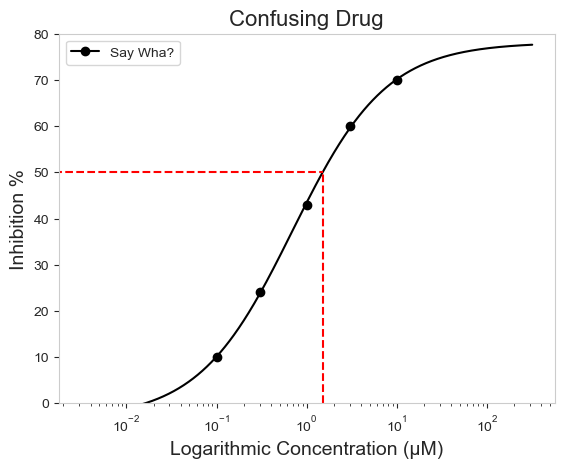

In [9]:
figure = test.single_curve_plot(concentration_col='Compound Conc',
                                response_col='% Inhibition Avg',
                                plot_title='Confusing Drug',
                                drug_name='Say Wha?',
                                xlabel='Logarithmic Concentration (µM)',
                                ylabel='Inhibition %',
                                legend=True,
                                conc_unit='µM',
                                xscale_ticks=(-2.5, 2.5),
                                line_color='black',
                                box=True,
                                box_color='red',
                                x_concentration=1.49940,
                                figsize = (6.4, 4.8),
                                verbose=True)

In this case, the Absolute IC50 more precisely puts the 50 in IC50. Keep in mind that this only works with the data on hand and for this case, it appears to be a more accurate representation of the dataset. 

### How to get more precise?
One way to get more precise IC50 calculations is to increase the number of concentrations tested for a given drug. More points, especially at the end of the plateau, would help give a better indication of the drug potency. Here we will add 2 additional concentration points to our test and calculate the **Relative** and **Absolute IC50 Values**

In [10]:
new_conc = [{'Compound Name':'Say Wha?', 'Compound Conc':10, '% Inhibition Avg': 8},
            {'Compound Name':'Say Wha?', 'Compound Conc':100000, '% Inhibition Avg': 90}]

confusing_example_df = pd.concat([confusing_example_df, pd.DataFrame(new_conc)], ignore_index=True)
confusing_example_df

,Compound Name,Compound Conc,% Inhibition 1,% Inhibition 2,% Inhibition Avg
0,Say Wha?,10000,70.0,71.0,70
1,Say Wha?,3000,61.0,59.0,60
2,Say Wha?,1000,42.0,44.0,43
3,Say Wha?,300,25.0,24.0,24
4,Say Wha?,100,9.0,10.0,10
5,Say Wha?,10,NaN,NaN,8
6,Say Wha?,100000,NaN,NaN,90


In [11]:
example = Calculator(confusing_example_df)
example_ic50 = example.calculate_absolute_ic50(name_col='Compound Name', concentration_col='Compound Conc', response_col='% Inhibition Avg')
example_ic50

,compound_name,maximum,minimum,relative ic50 (nM),absolute ic50 (nM),hill_slope
0,Say Wha?,92.497681,3.325575,1563.735262,1779.972212,0.723894


From the new table, you can see that adding more points will adjust both the **Relative** and **Absolute IC50** values. Both values will begin to move closer to each other. Again, this appears to be reasonable due to the Inhibition average of the dataset, where 50% inhibition should fall somewhere between the 1000 and 3000 nM concentration. This will also change the way the graph looks as follows: 

Say Wha? concentration will be in µM!
Concentration on X-axis will be in µM
Box X intersection:  1.78 µM
Box Y intersection:  50 %


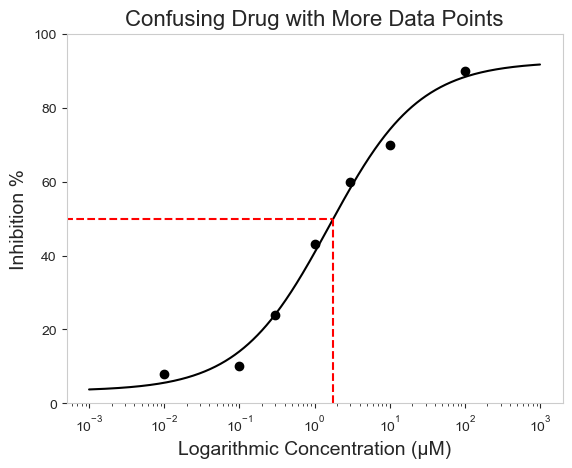

In [12]:
example_plot = PlotCurve(confusing_example_df)
figure = example_plot.single_curve_plot(concentration_col='Compound Conc',
                                        response_col='% Inhibition Avg',
                                        plot_title='Confusing Drug with More Data Points',
                                        drug_name='Say Wha?',
                                        xlabel='Logarithmic Concentration (µM)',
                                        ylabel='Inhibition %',
                                        legend=False,
                                        conc_unit='µM',
                                        xscale_ticks=(-3, 3),
                                        line_color='black',
                                        box=True,
                                        x_concentration=1.563735262, # Highlight Relative IC50 
                                        box_color='red',
                                        figsize=(6.4, 4.8),
                                        verbose=True)

Using the AATBioquest IC50 calculator, if you are feeling adventurous, can be used ot double check the above results. Both the **Relative** (1563.74 nM) and **Absolute IC50** (1782.84 nM) values are closer to the 50% response, with the Relative IC50 increasing to 47.89% response for this example. These results are also reasonable due to the dataset on hand. It may be subjected, but the curve can be smother, and additional testing would be needed to achieve this. Consulting an appropriate protocol would be advisable. 

# Takeaway
IC50 values can be confusing. Here I tried to explain a bit about Relative and Absolute IC50. I think Absolute IC50 may be a misnomer. It is not the "absolute" result for a drug. The results will always vary depending on a number of factors. Nevertheless, I use it in this case because it is absolute to the data on hand.  

In general, the more concentration points to obtain the plateau for 0% and 100% responses, the better. The best thing to do is to remember to take stock of your final dataset. Know where the 50% response should lay within your dataset and you can doublecheck the results by eyeballing the calculated (Relative or Absolute) IC50 value. But always remember - the calculated value is representative of the dataset **on hand** and not the definite (Absolute) result. 
 
🍾**Remember: Use your best judgement.**🎉